<a href="https://colab.research.google.com/github/17004963/SP1-LABS/blob/master/lesson3_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [58]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

# Testing an existing classifier

In [0]:
IMAGE_SIZE = (224, 224)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

In [0]:
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

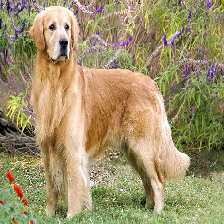

In [62]:
test_image = get_file('img.jpg','https://disenlis.com/wp-content/uploads/2019/01/Golden-Retriever-Standing1.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image

In [63]:
test_image = np.array(test_image)/255.0
test_image.shape

(224, 224, 3)

In [64]:
result = classifier.predict(test_image[np.newaxis, ...])
result.shape

(1, 1001)

In [65]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

208

In [0]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

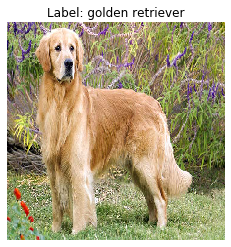

In [67]:
predicted_class_name = imagenet_labels[predicted_class]

plt.axis('off')
plt.title("Label: " + predicted_class_name, color = 'black')
plt.imshow(test_image)
plt.show()

# Transfer Learning

## Build the dataset

In [0]:
class_names = ['Cristiano_Ronaldo','Lionel_messi']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'Lionel_messi')  
train_im_dir = os.path.join(train_dir, 'Cristiano_Ronaldo')  
validation_ca_dir = os.path.join(validation_dir, 'Lionel_messi') 
validation_im_dir = os.path.join(validation_dir, 'Cristiano_Ronaldo')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [0]:
img_dir = os.path.realpath('Images/')

In [71]:
queries = ['pulga','barcelona','argentina','soccer','football']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='lionel messi '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=lionel messi pulga&source=lnms&tbm=isch
Total Time : 0:00:05.244735
Invalid image:  45.jpg cannot identify image file '/content/Images/45.jpg'
Invalid image:  42.jpg cannot identify image file '/content/Images/42.jpg'
Invalid image:  61.jpg cannot identify image file '/content/Images/61.jpg'
Invalid image:  78.jpg cannot identify image file '/content/Images/78.jpg'
Invalid image:  49.jpg cannot identify image file '/content/Images/49.jpg'
Invalid image:  31.jpg cannot write mode RGBA as JPEG
Invalid image:  58.jpg cannot identify image file '/content/Images/58.jpg'
Invalid image:  95.jpg cannot identify image file '/content/Images/95.jpg'
Invalid image:  76.jpg cannot write mode P as JPEG
Invalid image:  13.jpg cannot identify image file '/content/Images/13.jpg'
Invalid image:  66.jpg cannot identify image file '/content/Images/66.jpg'
Invalid image:  73.jpg cannot write mode RGBA as JPEG
Invalid image:  5.jpg cannot identify image file '/content/Image

KeyboardInterrupt: ignored

In [72]:
queries = ['cr7','Juventus','portugal','soccer','football']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='cristiano ronaldo'+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=cristiano ronaldocr7&source=lnms&tbm=isch
Total Time : 0:00:08.143264
Invalid image:  8.jpg cannot identify image file '/content/Images/8.jpg'
Invalid image:  60.jpg cannot write mode P as JPEG
Invalid image:  23.jpg cannot identify image file '/content/Images/23.jpg'
Invalid image:  84.jpg cannot identify image file '/content/Images/84.jpg'
Invalid image:  53.jpg cannot identify image file '/content/Images/53.jpg'
Invalid image:  92.jpg cannot identify image file '/content/Images/92.jpg'
Invalid image:  33.jpg cannot identify image file '/content/Images/33.jpg'
Invalid image:  55.jpg cannot identify image file '/content/Images/55.jpg'
Invalid image:  19.jpg cannot write mode RGBA as JPEG
Invalid image:  99.jpg cannot write mode P as JPEG
Invalid image:  82.jpg cannot write mode RGBA as JPEG
Invalid image:  54.jpg cannot write mode P as JPEG
Invalid image:  6.jpg cannot identify image file '/content/Images/6.jpg'
Invalid image:  10.jpg cannot write mod

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


https://www.google.co.in/search?q=cristiano ronaldofootball&source=lnms&tbm=isch
Total Time : 0:00:07.171281
Invalid image:  97.jpg cannot identify image file '/content/Images/97.jpg'
Invalid image:  94.jpg cannot identify image file '/content/Images/94.jpg'


In [74]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training Lionel Messi images:', len(os.listdir(train_ca_dir)))
print('total training Cristiano Ronaldo images:', len(os.listdir(train_im_dir)))

print('total validation Lionel Messi images:', len(os.listdir(validation_ca_dir)))
print('total validation Cristiano Ronaldo images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Lionel Messi images: 247
total training Cristiano Ronaldo images: 414
total validation Lionel Messi images: 30
total validation Cristiano Ronaldo images: 50
--
Total training images: 661
Total validation images: 80


## Using the dataset

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [76]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 661 images belonging to 2 classes.


In [77]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 80 images belonging to 2 classes.


## Testing the classifier

In [0]:
image_batch, labels_batch = next(train_data_gen)

In [79]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [80]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['rugby ball', 'parallel bars', 'rugby ball', 'volleyball',
       'soccer ball', 'comic book', 'torch', 'torch', 'torch',
       'soccer ball', 'balance beam', 'ballplayer', 'knee pad',
       'football helmet', 'breastplate', 'soccer ball', 'basketball',
       'baseball', 'ballplayer', 'basketball', 'cleaver', 'soccer ball',
       'racket', 'rugby ball', 'whistle', 'lab coat', 'basketball',
       'basketball', 'torch', 'basketball', 'balance beam', 'oxygen mask'],
      dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

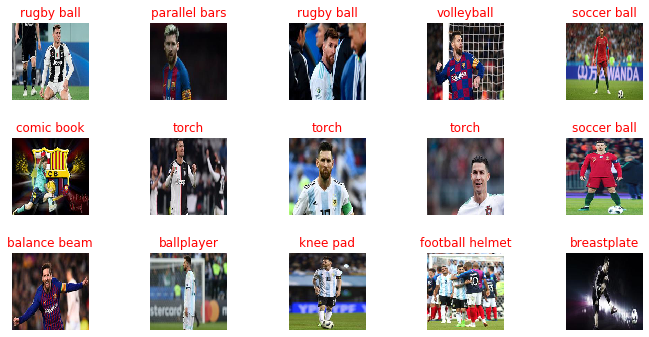

In [82]:
plot_images(image_batch, labels_batch, predicted_class_names)

## Downloading headless model

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [85]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

## Adding a classification head

In [87]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


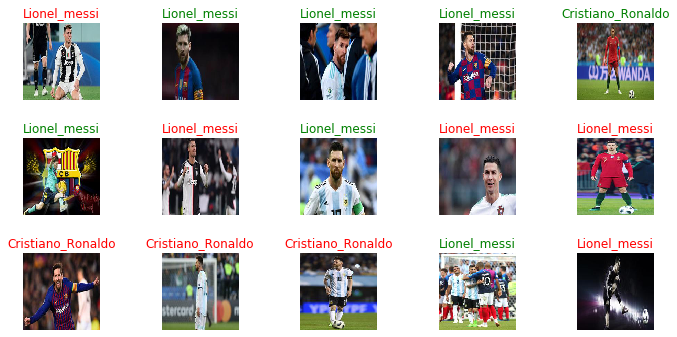

In [88]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Train the model

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [90]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 1/5
5/5 [==============================] - 38s 8s/step - loss: 1.3918 - accuracy: 0.5375 - val_loss: 0.7513 - val_accuracy: 0.7625
Epoch 2/5
5/5 [==============================] - 32s 6s/step - loss: 1.0779 - accuracy: 0.6644 - val_loss: 0.7384 - val_accuracy: 0.5875
Epoch 3/5
5/5 [==============================] - 34s 7s/step - loss: 0.4159 - accuracy: 0.7875 - val_loss: 0.4405 - val_accuracy: 0.8250
Epoch 4/5
5/5 [==============================] - 34s 7s/step - loss: 0.4101 - accuracy: 0.7937 - val_loss: 0.4143 - val_accuracy: 0.8000
Epoch 5/5
5/5 [==============================] - 34s 7s/step - loss: 0.3704 - accuracy: 0.8500 - val_loss: 0.4546 - val_accuracy: 0.8250


## Check results

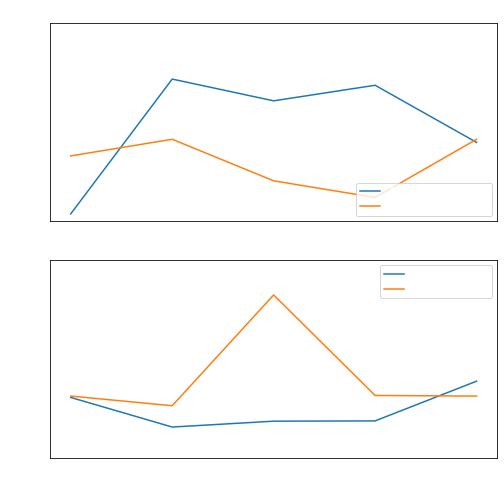

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

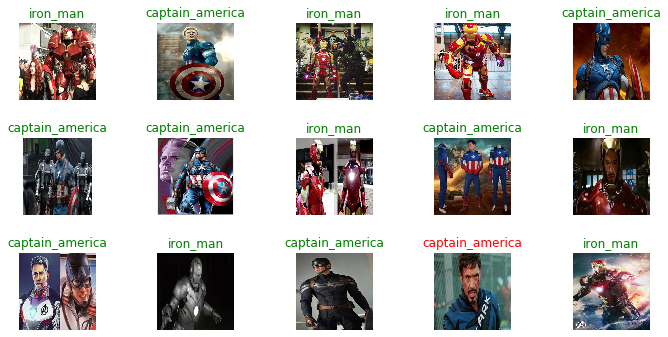

In [0]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)

##Application base model

In [0]:
base_model = ResNet50V2(input_shape=IMAGE_SIZE+(3,),
                                               include_top=False,
                                               weights='imagenet')

In [0]:
base_model.trainable = False

In [93]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [96]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [98]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 1/5
5/5 [==============================] - 41s 8s/step - loss: 1.2357 - accuracy: 0.4698 - val_loss: 0.6494 - val_accuracy: 0.7125
Epoch 2/5
5/5 [==============================] - 39s 8s/step - loss: 0.7970 - accuracy: 0.6500 - val_loss: 0.8264 - val_accuracy: 0.6375
Epoch 3/5
5/5 [==============================] - 40s 8s/step - loss: 0.5147 - accuracy: 0.7500 - val_loss: 0.5752 - val_accuracy: 0.6625
Epoch 4/5
5/5 [==============================] - 38s 8s/step - loss: 0.3876 - accuracy: 0.8313 - val_loss: 0.5908 - val_accuracy: 0.7125
Epoch 5/5
5/5 [==============================] - 38s 8s/step - loss: 0.4070 - accuracy: 0.8000 - val_loss: 0.4990 - val_accuracy: 0.7500


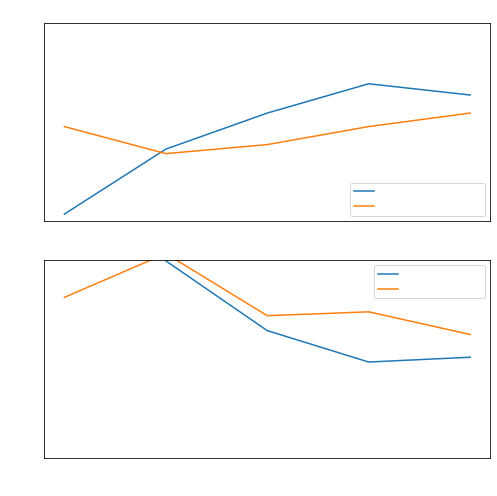

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.8])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

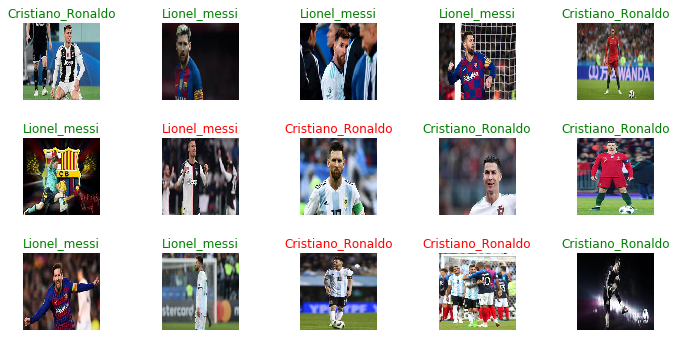

In [100]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Fine tuning

In [0]:
base_model.trainable = True

In [102]:
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 160
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False


Number of layers in the base model:  190


In [103]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 16,542,721
Non-trainable params: 9,121,280
_________________________________________________________________


In [104]:
initial_epochs = 5
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_data_gen,
                         epochs=total_epochs,
                         steps_per_epoch=5,
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_data_gen)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 5/10
5/5 [==============================] - 52s 10s/step - loss: 0.7434 - accuracy: 0.7500 - val_loss: 1.1748 - val_accuracy: 0.6875
Epoch 6/10
5/5 [==============================] - 48s 10s/step - loss: 0.4169 - accuracy: 0.7750 - val_loss: 1.7631 - val_accuracy: 0.7875
Epoch 7/10
5/5 [==============================] - 48s 10s/step - loss: 0.3504 - accuracy: 0.8125 - val_loss: 2.2196 - val_accuracy: 0.8250
Epoch 8/10
5/5 [==============================] - 48s 10s/step - loss: 0.2448 - accuracy: 0.8938 - val_loss: 4.8195 - val_accuracy: 0.8375
Epoch 9/10
5/5 [==============================] - 48s 10s/step - loss: 0.1368 - accuracy: 0.9625 - val_loss: 8.9706 - val_accuracy: 0.7375
Epoch 10/10
5/5 [==============================] - 48s 10s/step - loss: 0.0932 - accuracy: 0.9625 - val_loss: 4.5971 - val_accuracy: 0.8250


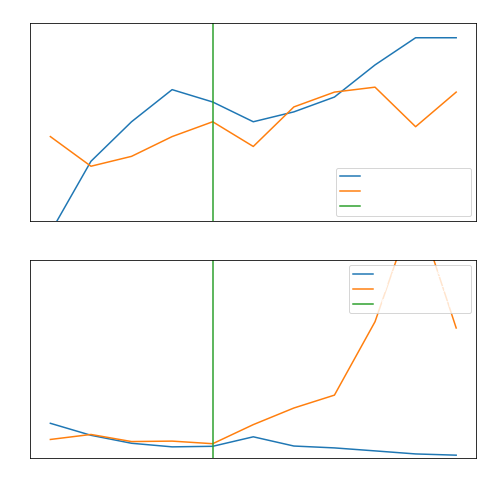

In [105]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 7.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

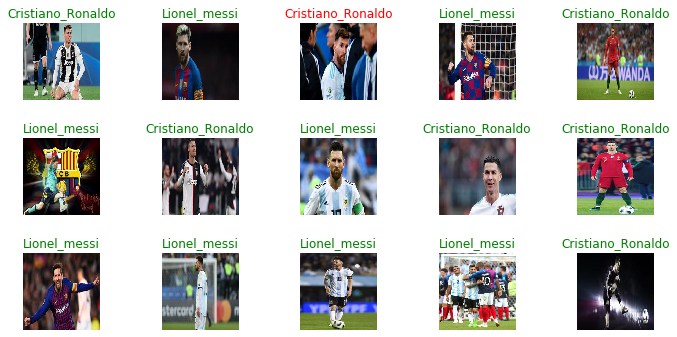

In [106]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)